# Installing Libraries

In [ ]:
! pip install xgboost

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.utils import resample
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import joblib

#Data Loading

In [ ]:
file_path = '/content/drive/MyDrive/Shreya_Tiwari_Paper_Notebook/dataset/Copy of cyber_attack.csv'
data = pd.read_csv(file_path)

#Exploratory Data Analysis (EDA)

In [ ]:
data.head()

,src_ip,dst_ip,src_port,dst_port,protocol,packet_size,packet_count,data_transferred,session_duration,tcp_flags,...,memory_usage,login_attempts,failed_logins,location_changes,unusual_activity,suspicious_processes,malicious_urls,malicious_files,exploit_attempts,label
0,192.168.98.106,10.182.100.225,43464,30068,ICMP,80,25,7553,879,PSH,...,65,3,4,2,0,0,1,0,1,1
1,172.21.207.82,172.19.49.64,60747,47522,ICMP,357,61,5282,804,RST,...,74,1,4,2,0,0,1,0,1,0
2,192.168.225.210,10.200.11.64,61539,27799,UDP,141,98,5421,365,ACK,...,82,8,3,2,0,1,0,1,1,0
3,10.149.1.208,192.168.15.244,47715,45363,UDP,1491,17,4317,222,SYN,...,68,2,2,1,1,0,1,0,0,1
4,172.23.238.117,10.192.165.22,32171,22250,UDP,1476,33,9623,587,PSH,...,34,5,0,1,1,1,1,0,0,0


In [ ]:
data.describe()

,src_port,dst_port,packet_size,packet_count,data_transferred,session_duration,app_usage,file_access,system_calls,cpu_usage,memory_usage,login_attempts,failed_logins,location_changes,unusual_activity,suspicious_processes,malicious_urls,malicious_files,exploit_attempts,label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,32558.826100,32341.345400,772.271600,50.045000,4996.457300,498.604000,48.540200,24.250300,551.059800,49.061200,49.580200,4.478900,1.997100,1.015600,0.502500,0.495100,0.496400,0.500700,0.498800,0.50220
std,18780.461925,18853.434448,417.365603,28.456714,2894.325137,289.713861,28.975899,14.428467,258.848994,29.057145,29.026082,2.862477,1.405734,0.819038,0.500019,0.500001,0.500012,0.500025,0.500024,0.50002
min,17.000000,3.000000,40.000000,1.000000,0.000000,1.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,16241.250000,15804.500000,417.000000,25.000000,2471.000000,248.000000,23.000000,12.000000,328.000000,23.000000,25.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,32277.500000,32355.500000,770.000000,50.000000,4997.000000,497.500000,48.000000,24.000000,556.000000,49.000000,50.000000,4.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.00000
75%,48645.750000,48659.250000,1132.000000,75.000000,7505.250000,750.000000,74.000000,37.000000,769.000000,74.000000,75.000000,7.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
max,65534.000000,65531.000000,1499.000000,99.000000,9999.000000,999.000000,99.000000,49.000000,999.000000,99.000000,99.000000,9.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   src_ip                10000 non-null  object
 1   dst_ip                10000 non-null  object
 2   src_port              10000 non-null  int64 
 3   dst_port              10000 non-null  int64 
 4   protocol              10000 non-null  object
 5   packet_size           10000 non-null  int64 
 6   packet_count          10000 non-null  int64 
 7   data_transferred      10000 non-null  int64 
 8   session_duration      10000 non-null  int64 
 9   tcp_flags             10000 non-null  object
 10  device_id             10000 non-null  object
 11  os_version            10000 non-null  object
 12  app_usage             10000 non-null  int64 
 13  file_access           10000 non-null  int64 
 14  system_calls          10000 non-null  int64 
 15  cpu_usage             10000 non-null 

#Data Cleaning and Data Preprocessing

In [ ]:
def detect_outliers(df, features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outliers = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outliers)
    return list(set(outlier_indices))

In [ ]:
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 src_ip                  0
dst_ip                  0
src_port                0
dst_port                0
protocol                0
packet_size             0
packet_count            0
data_transferred        0
session_duration        0
tcp_flags               0
device_id               0
os_version              0
app_usage               0
file_access             0
system_calls            0
cpu_usage               0
memory_usage            0
login_attempts          0
failed_logins           0
location_changes        0
unusual_activity        0
suspicious_processes    0
malicious_urls          0
malicious_files         0
exploit_attempts        0
label                   0
dtype: int64


In [ ]:
data = data.dropna()

#Exploratory Data Analysis (EDA) (visualization)

In [ ]:
features_to_check = ['packet_size', 'packet_count', 'data_transferred', 'session_duration', 'memory_usage', 'login_attempts', 'failed_logins', 'location_changes', 'unusual_activity', 'suspicious_processes', 'malicious_urls', 'malicious_files', 'exploit_attempts']
outliers = detect_outliers(data, features_to_check)
data = data.drop(outliers, axis=0).reset_index(drop=True)

<Figure size 1800x1200 with 0 Axes>

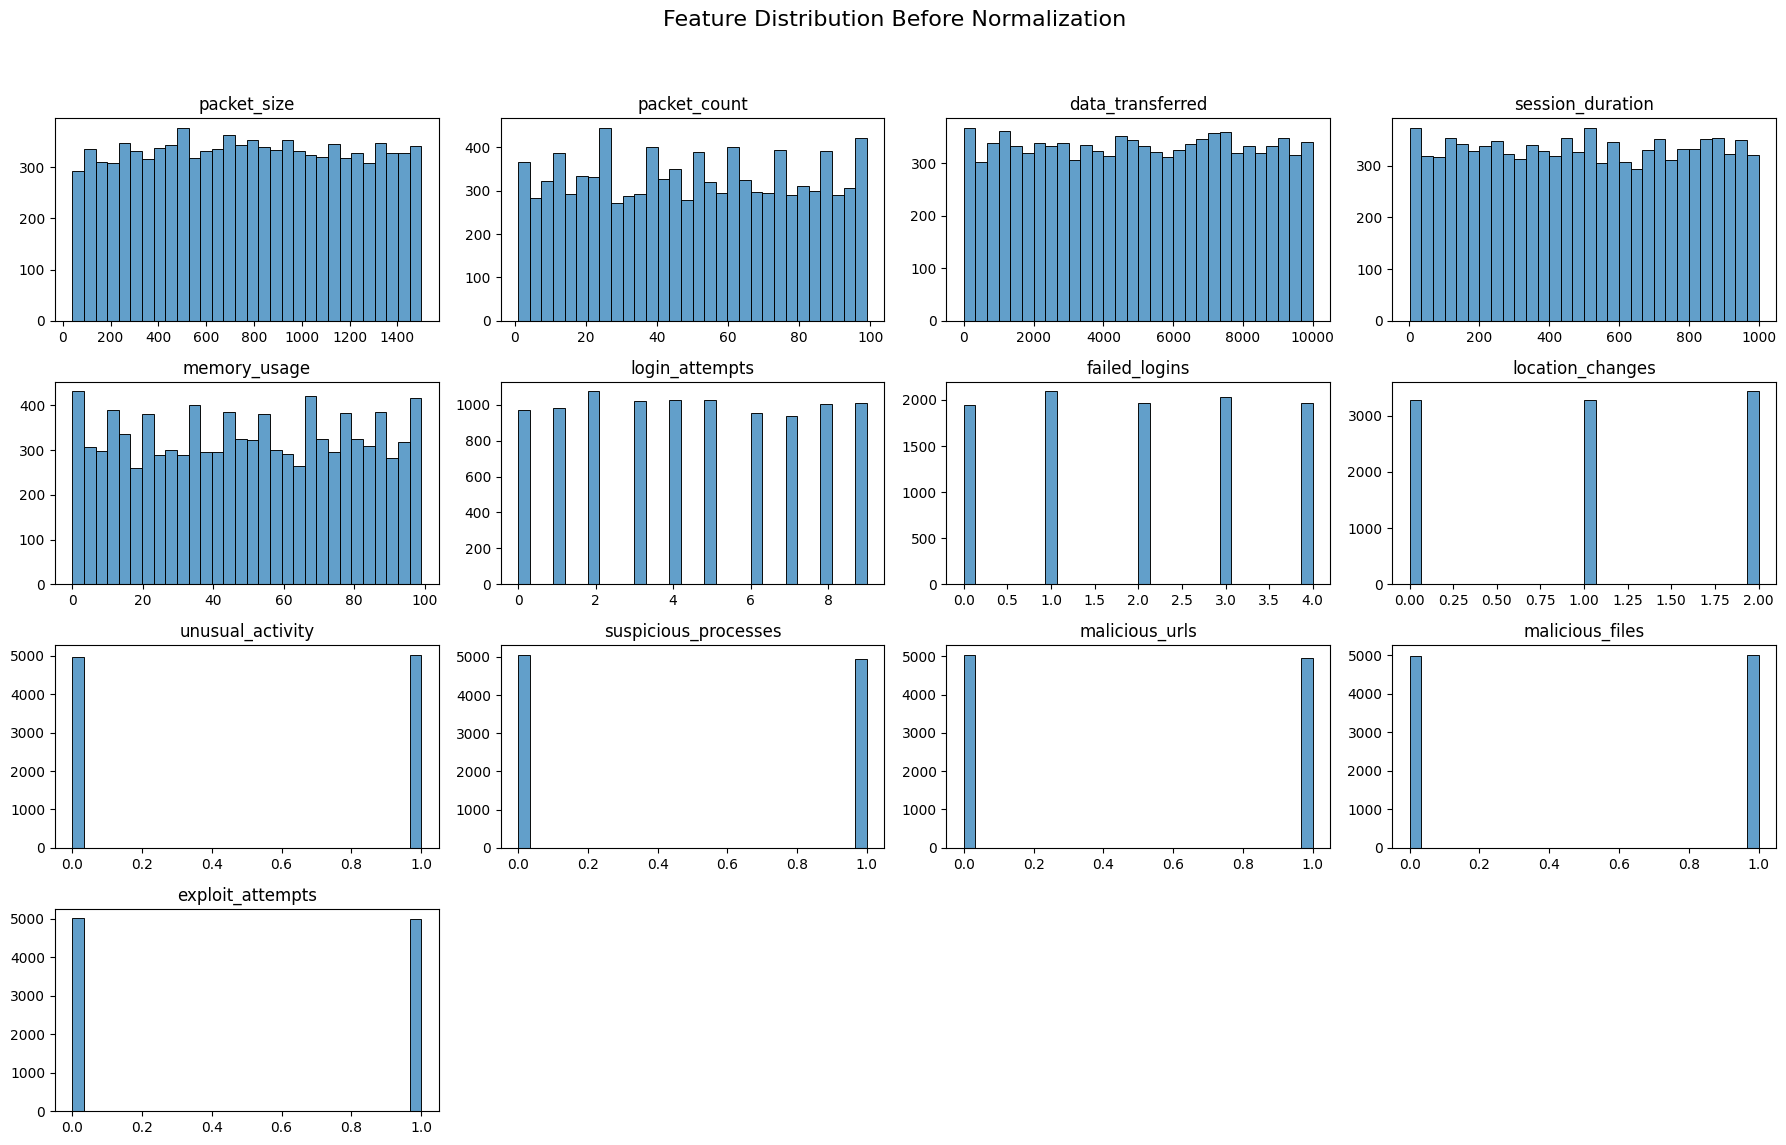

In [ ]:
plt.figure(figsize=(18, 12))

num_features = len(features_to_check)

ncols = 4
nrows = (num_features // ncols) + (num_features % ncols > 0)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 12))
fig.suptitle('Feature Distribution Before Normalization', fontsize=16)

axes = axes.flatten()

for i, feature in enumerate(features_to_check):
    sns.histplot(data[feature], bins=30, edgecolor='k', alpha=0.7, ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
scaler = StandardScaler()
data[features_to_check] = scaler.fit_transform(data[features_to_check])

<Figure size 1800x1200 with 0 Axes>

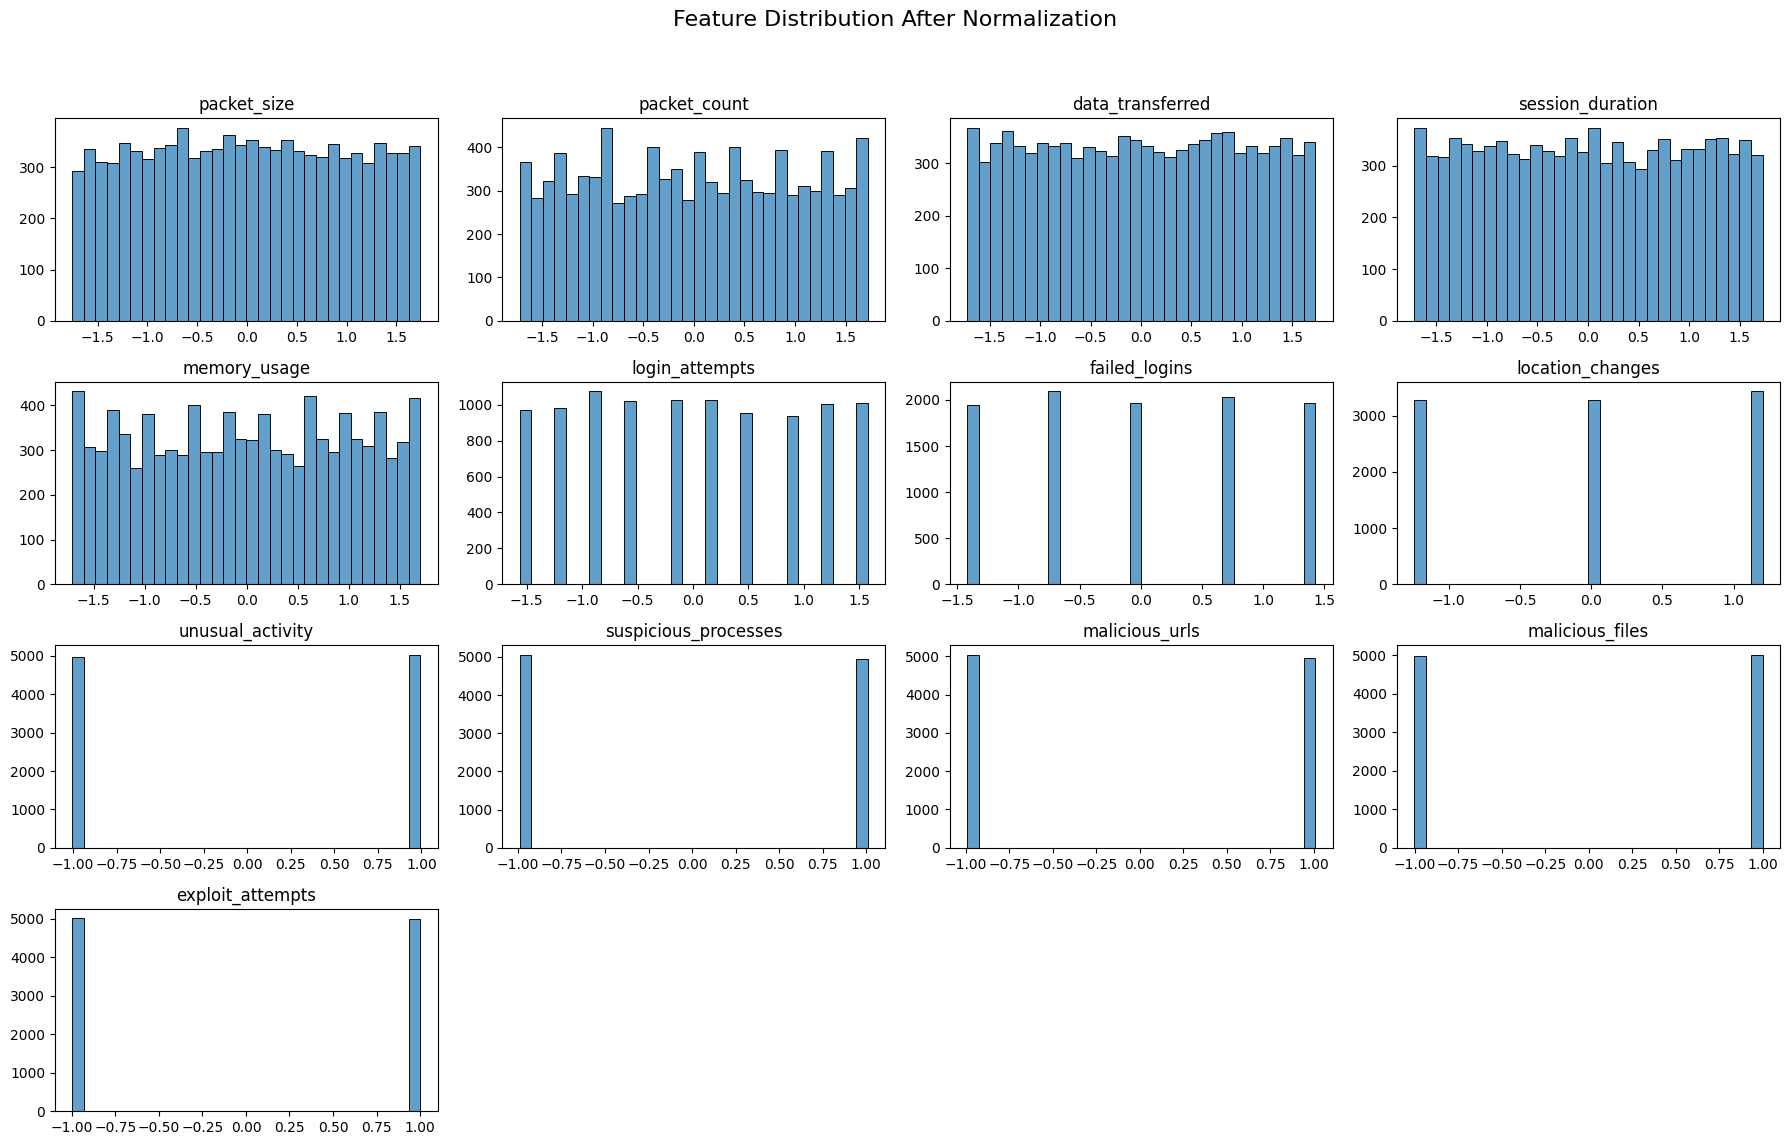

In [ ]:
plt.figure(figsize=(18, 12))

num_features = len(features_to_check)
ncols = 4
nrows = (num_features // ncols) + (num_features % ncols > 0)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 12))
fig.suptitle('Feature Distribution After Normalization', fontsize=16)

axes = axes.flatten()

for i, feature in enumerate(features_to_check):
    sns.histplot(data[feature], bins=30, edgecolor='k', alpha=0.7, ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#Feature Engineering

In [ ]:
data['packet_size_per_count'] = data['packet_size'] / data['packet_count']
data['data_per_session'] = data['data_transferred'] / data['session_duration']
data['memory_usage_per_login'] = data['memory_usage'] / (data['login_attempts'] + 1)
data['failed_login_ratio'] = data['failed_logins'] / (data['login_attempts'] + 1)

##Handling Class Imbalance

In [ ]:
class_counts = data['label'].value_counts()
print("Class counts:\n", class_counts)

Class counts:
 label
1    5022
0    4978
Name: count, dtype: int64


In [ ]:
data_majority = data[data['label'] == 0]
data_minority = data[data['label'] == 1]

In [ ]:
data_minority_upsampled = resample(data_minority,
                                   replace=True,
                                   n_samples=len(data_majority),
                                   random_state=123)

In [ ]:
data_balanced = pd.concat([data_majority, data_minority_upsampled])

##Feature Selection

In [ ]:
numeric_columns = data_balanced.select_dtypes(include=[np.number]).columns.tolist()

##Splitting Data into Features and Target

In [ ]:
X = data_balanced[numeric_columns].drop(columns=['label'])
y = data_balanced['label']

#Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Model Training

##Training Multiple Models

###Random Forest

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

###Gradient Boosting

In [ ]:
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

###XGBoost

In [ ]:
xgb_clf = XGBClassifier(n_estimators=100, random_state=42)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

###Neural Network

In [ ]:
nn_model = Sequential()
nn_model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(1, activation='sigmoid'))

NameError: name 'Sequential' is not defined

In [ ]:
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = nn_model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=0)

###Feature Importance Visualization

<ipython-input-92-23af6013d30d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


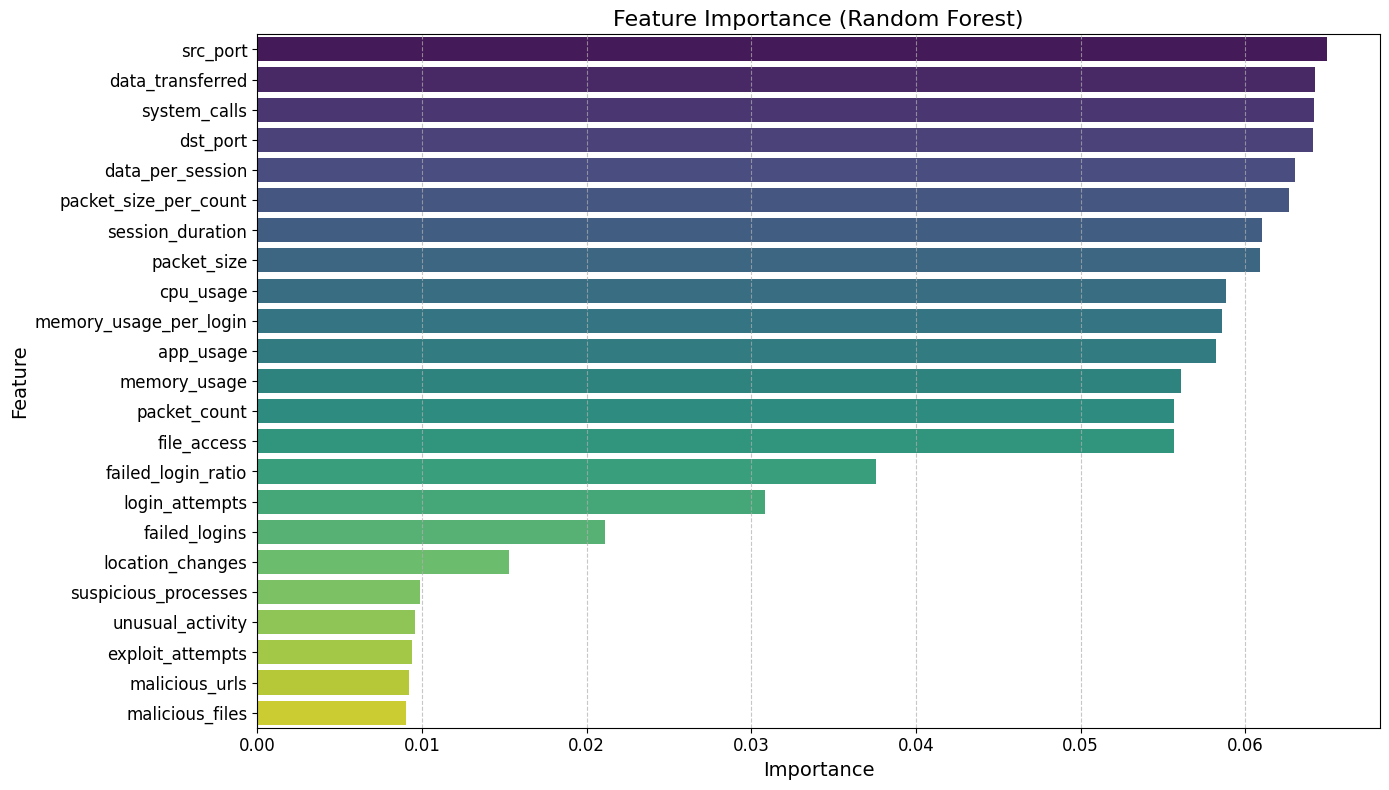

In [ ]:
plt.figure(figsize=(14, 8))
feature_importance = rf_clf.feature_importances_
feature_names = X_train.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance (Random Forest)', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

###Learning Curve Visualization

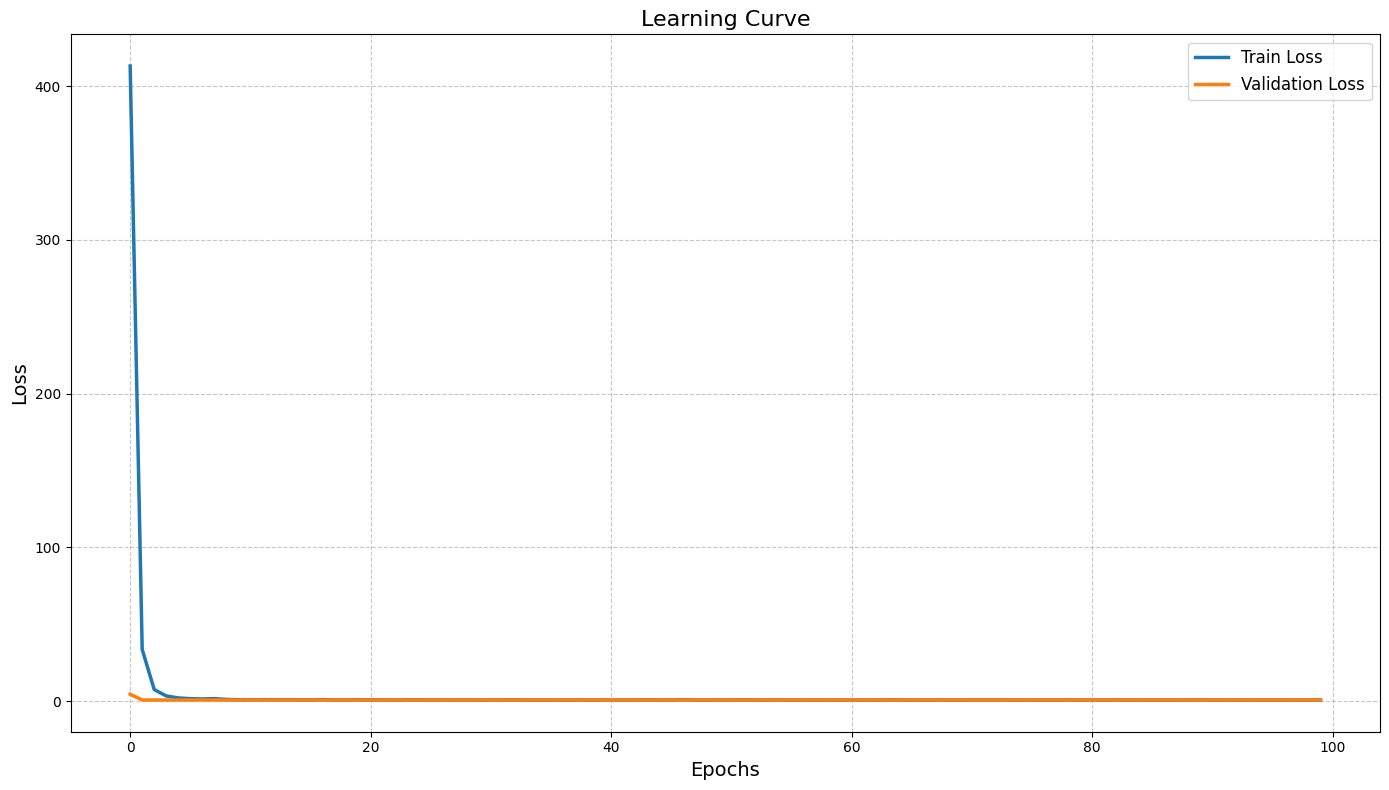

In [ ]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=history.history['loss'], label='Train Loss', linewidth=2.5)
sns.lineplot(data=history.history['val_loss'], label='Validation Loss', linewidth=2.5)
plt.title('Learning Curve', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#Model Evaluation

##Evaluation Metrics

In [ ]:
models = {
    'RandomForest': rf_clf,
    'GradientBoosting': gb_clf,
    'XGBoost': xgb_clf,
    'NeuralNetwork': nn_model
}

In [ ]:
for name, model in models.items():
    if name == 'NeuralNetwork':
        y_pred = (model.predict(X_test) > 0.5).astype("int32")
    else:
        y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'{name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}')

RandomForest - Accuracy: 0.73, Precision: 0.77, Recall: 0.64, F1-Score: 0.70
GradientBoosting - Accuracy: 0.55, Precision: 0.53, Recall: 0.57, F1-Score: 0.55
XGBoost - Accuracy: 0.67, Precision: 0.65, Recall: 0.69, F1-Score: 0.67
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
NeuralNetwork - Accuracy: 0.49, Precision: 0.49, Recall: 1.00, F1-Score: 0.66


##Confusion Matrix

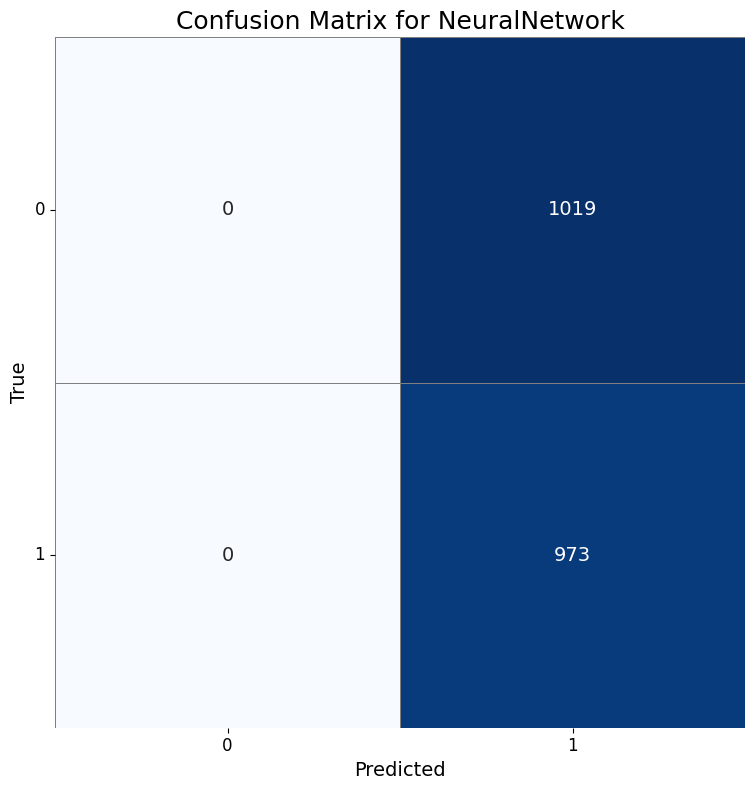

In [ ]:
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14}, linewidths=0.5, linecolor='gray', square=True)
plt.title(f'Confusion Matrix for {name}', fontsize=18)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('True', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.show()

##ROC Curve

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


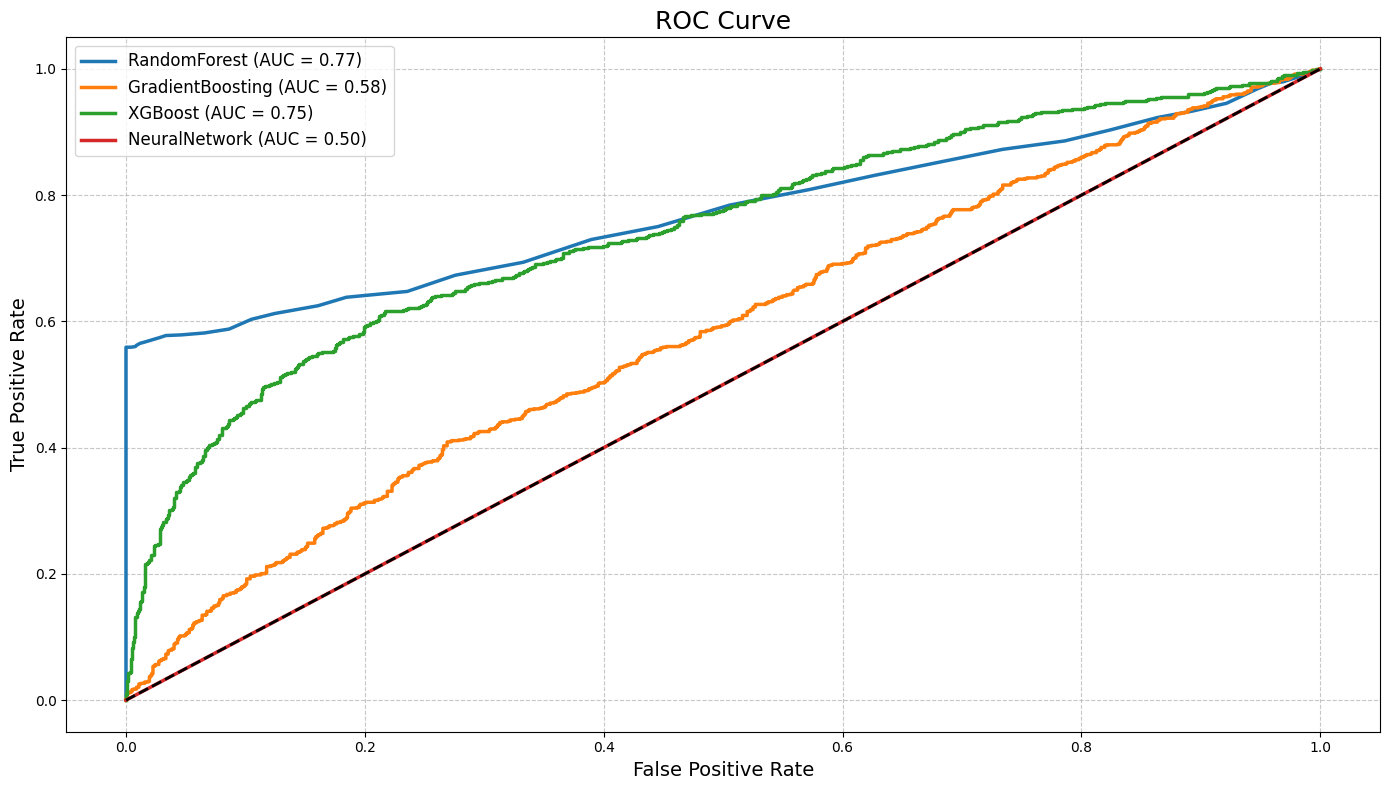

In [ ]:
plt.figure(figsize=(14, 8))

for name, model in models.items():
    if name != 'NeuralNetwork':
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, linewidth=2.5, label=f'{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=18)
plt.legend(loc='best', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##Precision-Recall Curve

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


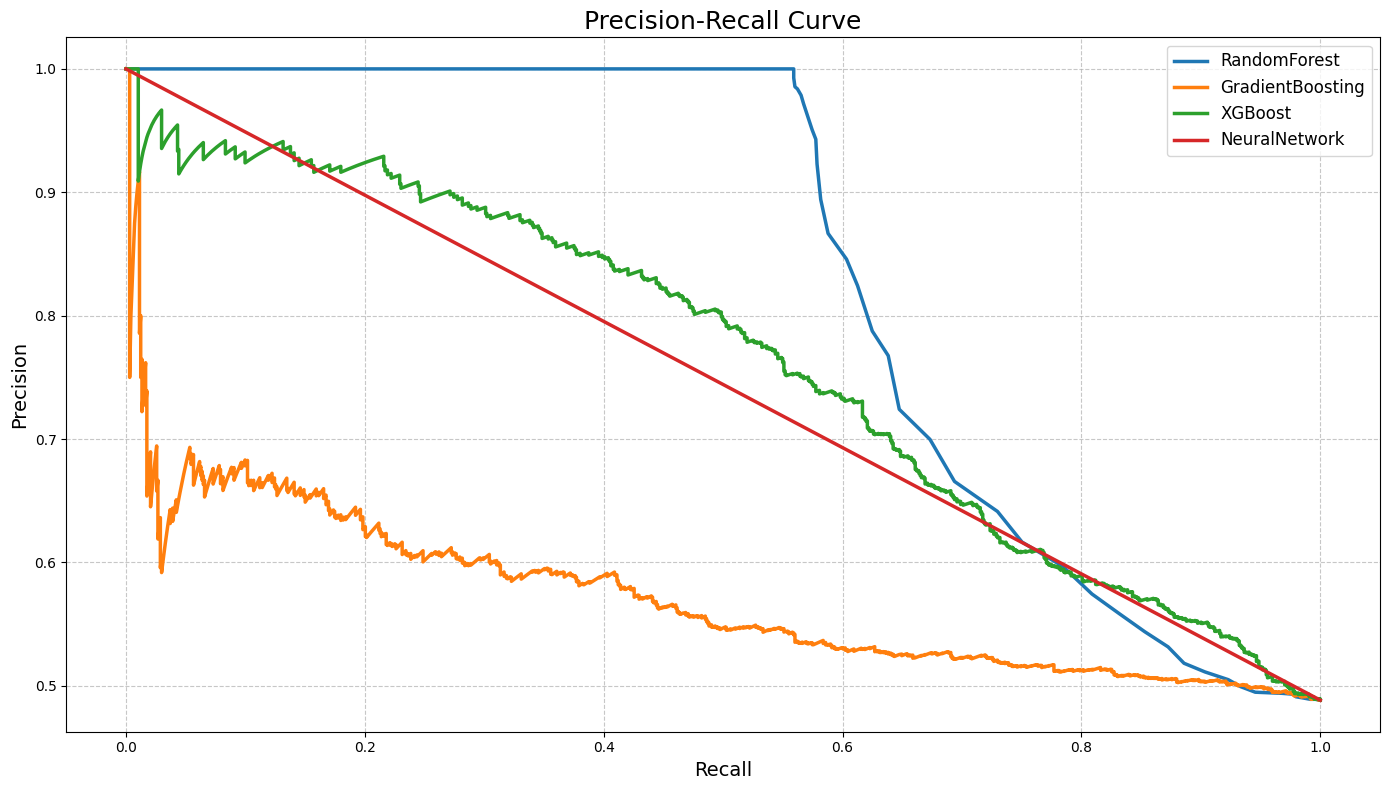

In [ ]:
plt.figure(figsize=(14, 8))

for name, model in models.items():
    if name != 'NeuralNetwork':
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.predict(X_test)
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    plt.plot(recall, precision, linewidth=2.5, label=f'{name}')

plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve', fontsize=18)
plt.legend(loc='best', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#Model Stacking

##Creating and Training the Stacking Model

In [ ]:
stacking_clf = StackingClassifier(
    estimators=[
        ('rf', rf_clf),
        ('gb', gb_clf),
        ('xgb', xgb_clf)
    ],
    final_estimator=LogisticRegression()
)

In [ ]:
stacking_clf.fit(X_train, y_train)
y_pred_stacking = stacking_clf.predict(X_test)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
precision_stacking = precision_score(y_test, y_pred_stacking)
recall_stacking = recall_score(y_test, y_pred_stacking)
f1_stacking = f1_score(y_test, y_pred_stacking)

In [ ]:
print(f'Stacking Model - Accuracy: {accuracy_stacking*100:.2f}, Precision: {precision_stacking:.2f}, Recall: {recall_stacking:.2f}, F1-Score: {f1_stacking:.2f}')

Stacking Model - Accuracy: 74.30, Precision: 0.82, Recall: 0.61, F1-Score: 0.70


#Visualization

##Distribution of Predictions

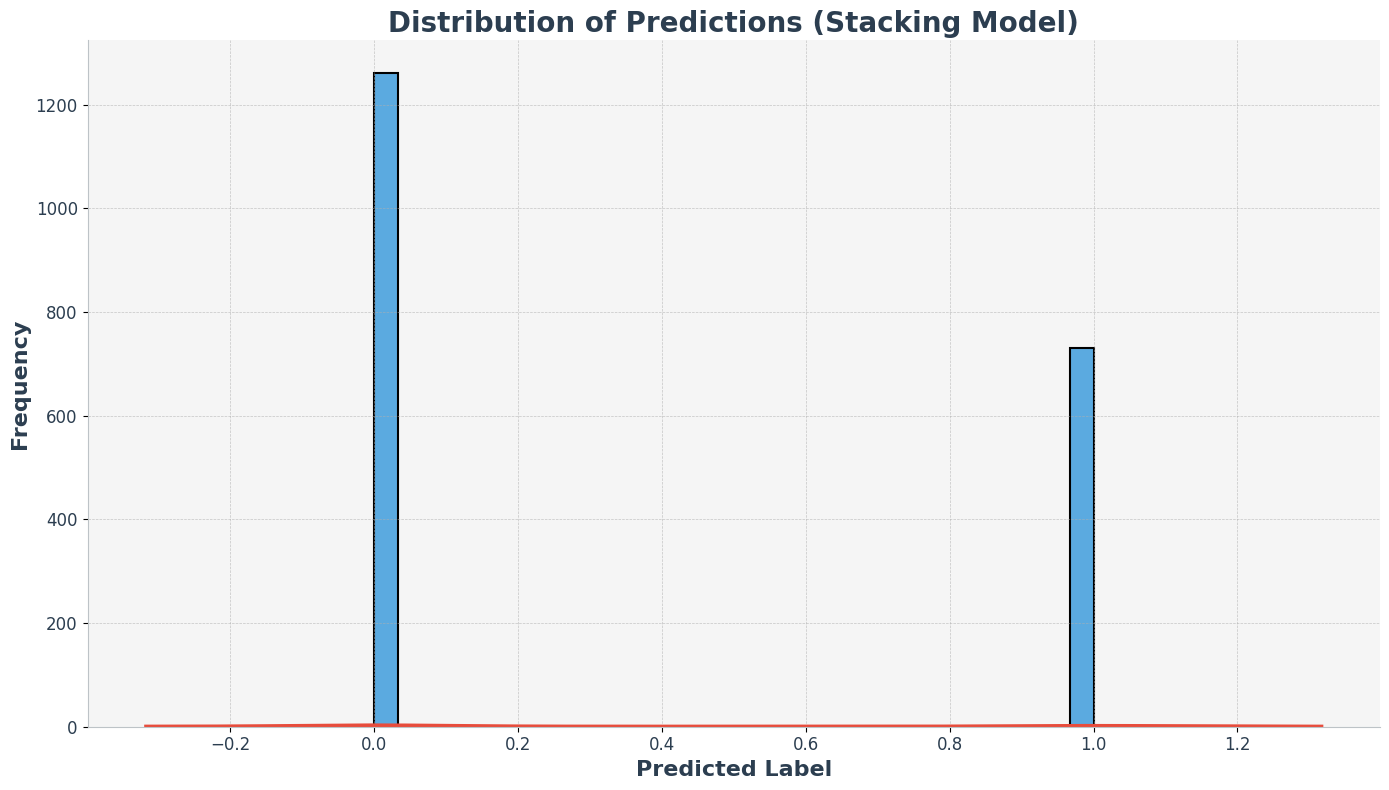

In [ ]:
plt.figure(figsize=(14, 8))

# Define custom colors and styles
bar_color = '#3498db'
kde_color = '#e74c3c'
background_color = '#f5f5f5'

sns.histplot(y_pred_stacking, kde=False, bins=30, color=bar_color, edgecolor='black', linewidth=1.5, alpha=0.8)
sns.kdeplot(y_pred_stacking, color=kde_color, linewidth=3)

plt.title('Distribution of Predictions (Stacking Model)', fontsize=20, fontweight='bold', color='#2c3e50')
plt.xlabel('Predicted Label', fontsize=16, fontweight='bold', color='#2c3e50')
plt.ylabel('Frequency', fontsize=16, fontweight='bold', color='#2c3e50')
plt.xticks(fontsize=12, color='#2c3e50')
plt.yticks(fontsize=12, color='#2c3e50')

# Customize grid and background
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.gca().set_facecolor(background_color)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('#bdc3c7')
plt.gca().spines['bottom'].set_color('#bdc3c7')

plt.tight_layout()
plt.show()

#Error Analysis

##Identifying Errors

In [ ]:
errors = X_test[y_test != y_pred_stacking]
print(f'Number of errors: {len(errors)}')

Number of errors: 512


#Cross-Validation

In [ ]:
best_model = stacking_clf
cv_scores = cross_val_score(best_model, X, y, cv=5)
print(f'Cross-Validation Accuracy: {cv_scores.mean():.2f}')

Cross-Validation Accuracy: 0.74


#Model Comparison

In [ ]:
model_names = ['RandomForest', 'GradientBoosting', 'XGBoost', 'NeuralNetwork', 'Stacking']
accuracy_scores = [accuracy_score(y_test, (model.predict(X_test) > 0.5).astype("int32") if name == 'NeuralNetwork' else model.predict(X_test)) for name, model in models.items()] + [accuracy_stacking]
precision_scores = [precision_score(y_test, (model.predict(X_test) > 0.5).astype("int32") if name == 'NeuralNetwork' else model.predict(X_test)) for name, model in models.items()] + [precision_stacking]
recall_scores = [recall_score(y_test, (model.predict(X_test) > 0.5).astype("int32") if name == 'NeuralNetwork' else model.predict(X_test)) for name, model in models.items()] + [recall_stacking]
f1_scores = [f1_score(y_test, (model.predict(X_test) > 0.5).astype("int32") if name == 'NeuralNetwork' else model.predict(X_test)) for name, model in models.items()] + [f1_stacking]

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
comparison_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-Score': f1_scores
})
print(comparison_df)

              Model  Accuracy  Precision    Recall  F1-Score
0      RandomForest  0.728916   0.767614  0.638232  0.696970
1  GradientBoosting  0.548193   0.534995  0.573484  0.553571
2           XGBoost  0.669679   0.652174  0.693731  0.672311
3     NeuralNetwork  0.488454   0.488454  1.000000  0.656324
4          Stacking  0.742972   0.815321  0.612539  0.699531


<Figure size 1400x800 with 0 Axes>

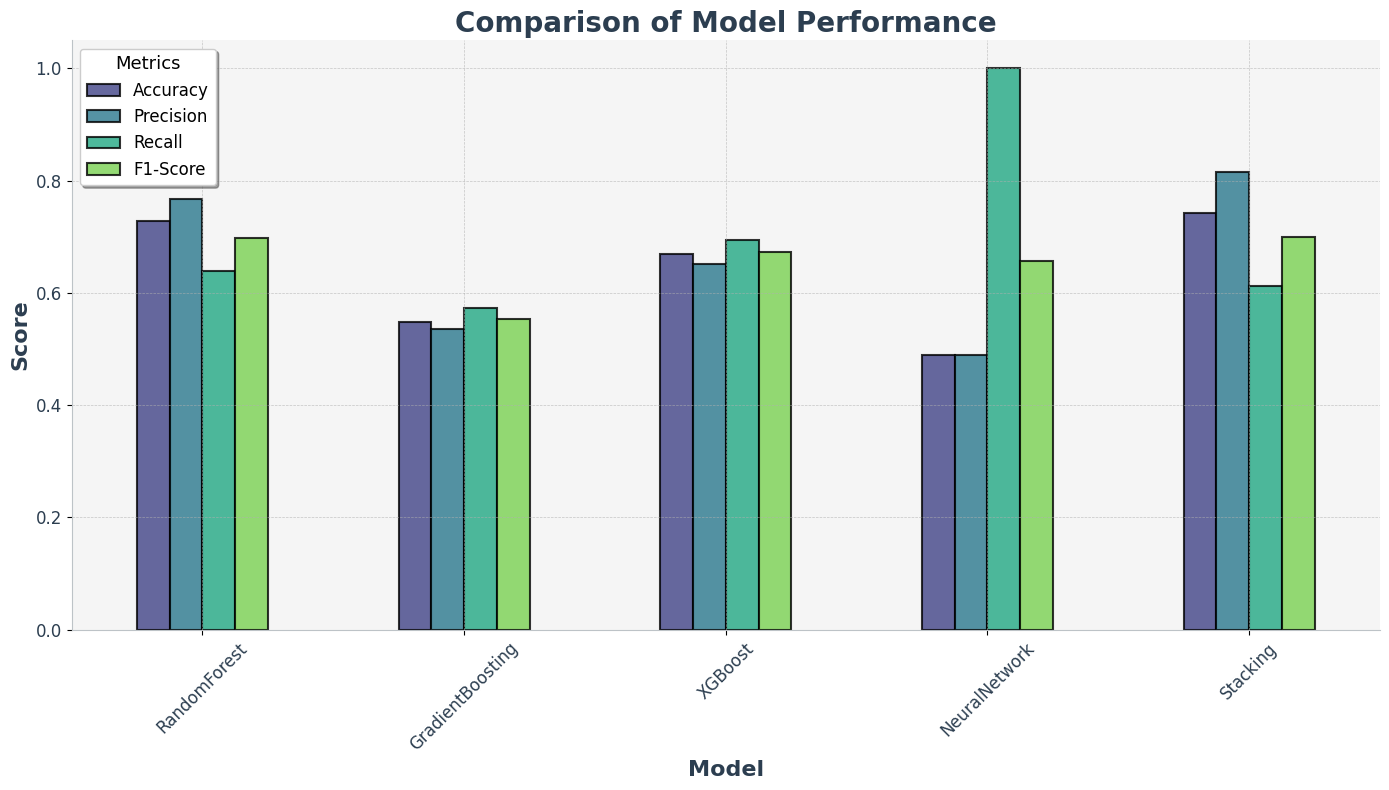

In [ ]:
plt.figure(figsize=(14, 8))

colors = sns.color_palette('viridis', n_colors=4)

ax = comparison_df.plot(kind='bar', x='Model', y=['Accuracy', 'Precision', 'Recall', 'F1-Score'], color=colors, edgecolor='black', linewidth=1.5, alpha=0.8, figsize=(14, 8))

plt.title('Comparison of Model Performance', fontsize=20, fontweight='bold', color='#2c3e50')
plt.xlabel('Model', fontsize=16, fontweight='bold', color='#2c3e50')
plt.ylabel('Score', fontsize=16, fontweight='bold', color='#2c3e50')
plt.xticks(fontsize=12, color='#2c3e50', rotation=45)
plt.yticks(fontsize=12, color='#2c3e50')

plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.gca().set_facecolor('#f5f5f5')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('#bdc3c7')
plt.gca().spines['bottom'].set_color('#bdc3c7')

plt.legend(title='Metrics', fontsize=12, title_fontsize='13', frameon=True, shadow=True, fancybox=True)
plt.tight_layout()
plt.show()

#Model Saving

In [ ]:
joblib.dump(best_model, '/content/drive/MyDrive/Pegasus_Spyware_Attack/models/best_model.pkl')
joblib.dump(scaler, '/content/drive/MyDrive/Pegasus_Spyware_Attack/models/scaler.pkl')

NameError: name 'joblib' is not defined